In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [2]:
def isFarEnoughFromLine(p1, distance):
    # Assume line is x = y
    x = p1[0]
    y = p1[1]
    return (y >= (x + distance)) or (y <= (x - distance)) 

In [3]:
def lineLabel(p1):
    x = p1[0]
    y = p1[1]
    if x > y:
        return 1
    else:
        return 0

In [4]:
def generatePoints(size, distance, labellingFunction, distanceCheck):    
    points = np.zeros((size,2))
    labels = np.zeros(size, dtype=np.int)
    i=0
    accepted = set()
    while i < size:
        x = random.randint(-50, 50)
        y = random.randint(-50, 50)
        point = (x,y)
        if not (point in accepted) and distanceCheck(point, distance):
            accepted.add(point)
            points[i, 0] = x
            points[i, 1] = y
            labels[i] = labellingFunction(point)
            i = i+1
    return (points, labels)

In [5]:
(points, labels) = generatePoints(1000, 1, lineLabel, isFarEnoughFromLine)

In [6]:
#print(points)
#print(labels)

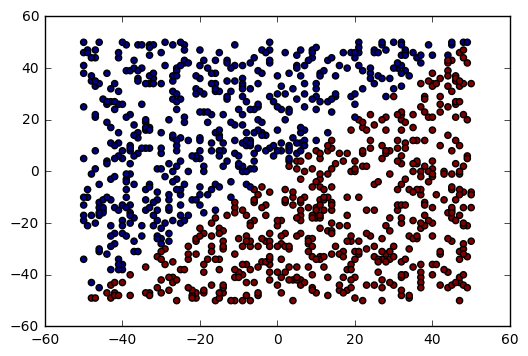

In [7]:
plt.scatter(points[:,0], points[:,1], c=labels[:])
plt.show()

In [8]:
np.save("Line.Points.1000.npy", points)
np.save("Line.Labels.1000.npy", labels)

In [9]:
def isFarEnoughFromCircle(p1, distance):
    x = float(p1[0])
    y = float(p1[1])
    d = float(distance)
    # Assume circle of radius 30
    pointRadius = math.sqrt(x**2 + y**2)
    return (pointRadius >= 30+d) or (pointRadius <= 30-d)
    

In [10]:
def circleLabel(p1):
    x = float(p1[0])
    y = float(p1[1])
    #Assume circle of radius 30
    pointRadius = math.sqrt(x**2 + y**2)
    if pointRadius > 30:
        return 0
    else:
        return 1

In [11]:
(points, labels) = generatePoints(1000, 1, circleLabel, isFarEnoughFromCircle)

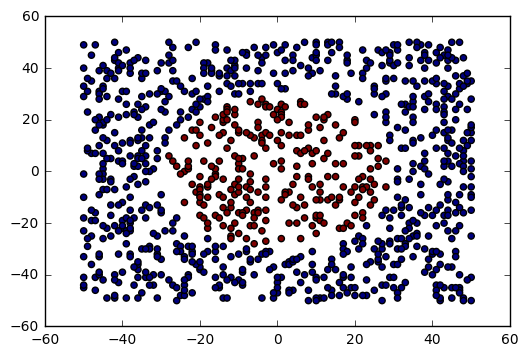

In [12]:
plt.scatter(points[:,0], points[:,1], c=labels[:])
plt.show()

In [13]:
np.save("Circle.Points.1000.npy", points)
np.save("Circle.Labels.1000.npy", labels)

In [14]:
def isFarEnoughFromParabola(p1, distance):
    x = float(p1[0])
    y = float(p1[1])
    d = float(distance)
    # Assume parabola is y = 0.25*x**2 - 40
    # Distance calculation is inaccurate, but truly parallel parabolas separated by fixed distance 
    # are hard
    return (y >= 0.25*x**2 - 40 + d) or (y <= 0.25*x**2 - 40 - d) 

In [15]:
def parabolaLabel(p1):
    x = float(p1[0])
    y = float(p1[1])
    #Assume parabola is y = 0.25*x**2 - 40
    if y > 0.25*x**2 - 40:
        return 1
    else:
        return 0

In [16]:
(points, labels) = generatePoints(1000, 1, parabolaLabel, isFarEnoughFromParabola)

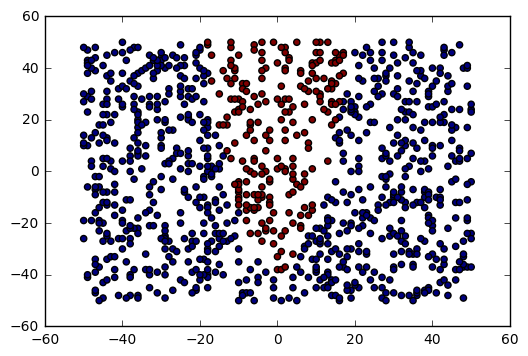

In [17]:
plt.scatter(points[:,0], points[:,1], c=labels[:])
plt.show()

In [18]:
np.save("Parabola.Points.1000.npy", points)
np.save("Parabola.Labels.1000.npy", labels)